<a href="https://colab.research.google.com/github/MlkNk/Deep_Learning_Project/blob/main/Projet_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload() #Uploader kaggle.json


# Configuration de l'accès à l'API

import os
import shutil

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

# Installation de la librairie kaggle
!pip install -q kaggle

# Téléchargement et extraction du dataset
!kaggle datasets download -d suchintikasarkar/sentiment-analysis-for-mental-health

import zipfile
with zipfile.ZipFile("sentiment-analysis-for-mental-health.zip", 'r') as zip_ref:
    zip_ref.extractall("mental_health_dataset")


#Verification du contenu
import os

os.listdir("mental_health_dataset")


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
License(s): DbCL-1.0
  0% 0.00/11.1M [00:00<?, ?B/s]
100% 11.1M/11.1M [00:00<00:00, 194MB/s]


['Combined Data.csv']

In [ ]:
# Si vous n'avez pas de compte Kaggle :
# Télécharger le fichier ZIP depuis le lien :
# https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health

'''
from google.colab import files
files.upload()  # ← Sélection du fichier ZIP téléchargé

# Décompression
import zipfile
with zipfile.ZipFile("sentiment-analysis-for-mental-health.zip", 'r') as zip_ref:
    zip_ref.extractall("mental_health_dataset") '''

'\nfrom google.colab import files\nfiles.upload()  # ← Sélection du fichier ZIP téléchargé\n\n# Décompression\nimport zipfile\nwith zipfile.ZipFile("sentiment-analysis-for-mental-health.zip", \'r\') as zip_ref:\n    zip_ref.extractall("mental_health_dataset") '

In [ ]:
#Chargement des données

import pandas as pd
df = pd.read_csv("mental_health_dataset/Combined Data.csv")

df.head()

print("Dimensions du dataset :", df.shape)

df.info()

df.sample(10)


Dimensions du dataset : (53043, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


,Unnamed: 0,statement,status
49023,49023,Stress I’m so stressed right now that my heart...,Stress
41716,41716,paulaabdul awww good luck paula please don t w...,Normal
40033,40033,i m tired and exhausted at this point i m just...,Depression
36899,36899,@MrsZee Go you,Normal
44840,44840,why is change by pac not on itunes boo,Normal
43064,43064,feeling a bit better today at least i can walk...,Normal
10504,10504,Last words here if I do not make it. Keep stro...,Depression
37498,37498,"@ChildfreeOnline Yes, I would pay more to to f...",Normal
4251,4251,morning young boy,Normal
15543,15543,Just tired of life. I am so ugly. Please do no...,Depression


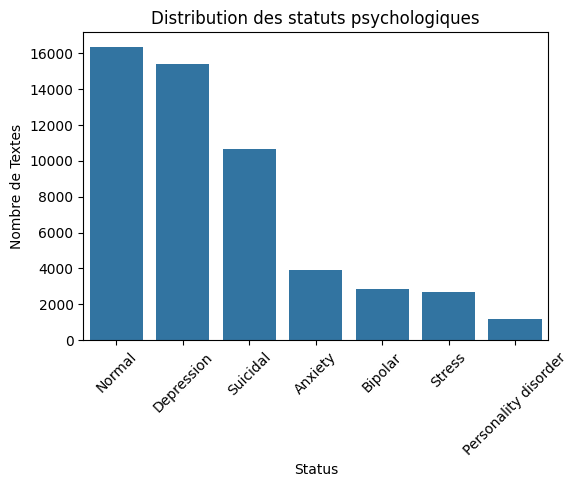

In [ ]:
# Fréquence des statuts
df['status'].value_counts()



# Visualisation de la répartition des classes

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index)
plt.title("Distribution des statuts psychologiques")
plt.xlabel("Status")
plt.ylabel("Nombre de Textes")
plt.xticks(rotation=45)
plt.show()



In [ ]:
#Vérification de doublons

print(df.duplicated().sum())
df = df.drop_duplicates()

# Comptage et suppression des valeurs vides ou NaN

print(df.isnull().sum())
df = df.dropna(subset=['statement'])


0
Unnamed: 0      0
statement     362
status          0
dtype: int64


In [ ]:
# Vérification des types de données dans la colonne 'statement'
df['statement'].apply(type).value_counts()



,count
statement,
<class 'str'>,52681


In [ ]:
# Nettoyage du texte : suppression des valeurs non textuelles (str)
#.reset_index(drop=True) est utilisé ici pour éviter les warnings liés à l’indexation de sous-ensembles.

df = df[df['statement'].apply(lambda x: isinstance(x, str))].reset_index(drop=True)

In [ ]:
#Ajout de la colonne du nombre de caractères de chaque texte
df["text_length"] = df["statement"].apply(len)

# Répartition statisque pour voir approximativement la longueur des textes
df["text_length"].describe()


,text_length
count,52681.000000
mean,578.713863
std,846.269078
min,2.000000
25%,80.000000
50%,317.000000
75%,752.000000
max,32759.000000


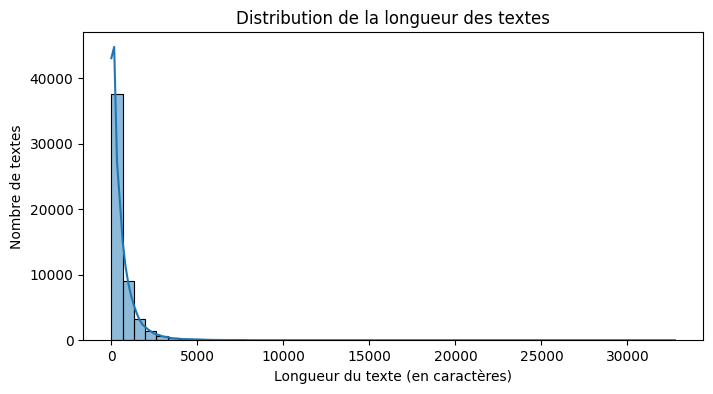

In [ ]:
#Représentation visuelle de répartiton de la longueur des textes ci-dessus
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution de la longueur des textes")
plt.xlabel("Longueur du texte (en caractères)")
plt.ylabel("Nombre de textes")
plt.show()


In [ ]:
# Suppression des textes très courts (< 10 caractères) ou très longs (> 2000 caractères)
df = df[(df["text_length"] >= 10) & (df["text_length"] <= 2000)].copy()


#Analyse exploratoire des données

##  Dimensions du dataset
- Nombre total de textes
- Nombre de classes
- Longueur moyenne des textes

## Nettoyage initial
- Suppression des doublons
- Filtrage des tweets non textuels
- Analyse des longueurs

---

Résultat :
- 52 681 textes valides conservés
- Longueur médiane ≈ 317 caractères
- Textes courts (<10) et très longs (>2000) supprimés


In [ ]:
#Installation de nltk, utile pour le prétraitement
!pip install nltk --quiet

# NLTK
import nltk
nltk.download('punkt_tab')  # Tokeniseur pour découper le texte en mots
nltk.download('stopwords')  # Stopwords anglais
nltk.download('wordnet')
nltk.download('omw-1.4')  # Pour plus de langues



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Liste des mots vides en anglais
stop_words = set(stopwords.words('english'))

# Initialisation de la Lemmatisation (mot réduit à la racine logique)
lemmatizer = WordNetLemmatizer()

# Fonction de nettoyage de tweet
def clean_text(text):
    if not isinstance(text, str):
      return ""
    # Minuscule
    text = text.lower()
    # Suppression des URLs, mentions, hashtags
    text = re.sub(r"http\S+|www\S+|https\S+|@\w+|#\w+", '', text)
    # Suppression de la ponctuation et chiffres
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # Tokenisation
    tokens = word_tokenize(text)
    # Suppression des stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatisation des mots
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


In [ ]:
#Application du nettoyage sur la colonne 'statement' + aperçu
df["clean_statement"] = df["statement"].apply(clean_text)
df[["statement", "clean_statement"]].sample(5)


,statement,clean_statement
10104,He loved to chase my truck coming out of the d...,loved chase truck coming drive way mom said ne...
51517,what avoidance feels like to me i'm not diagno...,avoidance feel like im diagnosed always though...
6946,"18. Judging from the PP, the person is cool, s...",judging pp person cool sweet forgot mutual new...
29893,I made a mistake as a result of being shaken u...,made mistake result shaken complained bos fals...
36723,i cant stop fucking upi amselfish gutless disr...,cant stop fucking upi amselfish gutless disres...


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encodage de la colonne 'status'
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["status"])

# Mapping des classes encodées
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping des classes :", label_mapping)



Mapping des classes : {'Anxiety': np.int64(0), 'Bipolar': np.int64(1), 'Depression': np.int64(2), 'Normal': np.int64(3), 'Personality disorder': np.int64(4), 'Stress': np.int64(5), 'Suicidal': np.int64(6)}


## Encodage des classes de la variable status

La variable `status` contient les "étiquettes" des différents états psychologiques.  

Pour la modélisation, nous avons encodé ces étiquettes en valeurs numériques avec `LabelEncoder` :

| Étiquette (status)         | Label  |
|----------------------------|---------
| Anxiety                    | 0      |
| Bipolar                    | 1      |
| Depression                 | 2      |
| Normal                     | 3      |
| Personality disorder       | 4      |
| Stress                     | 5      |
| Suicidal                   | 6      |

Ce mapping est utilisé tout au long du projet pour entraîner, prédire et interpréter les résultats.


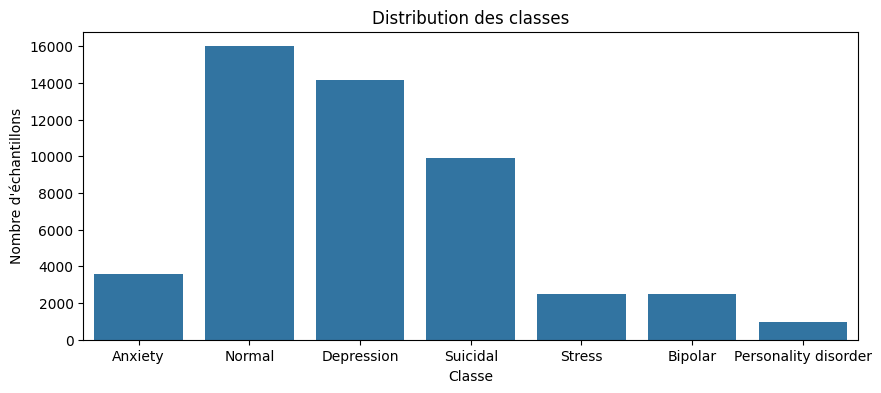

In [ ]:
# Affichage de la distribution des classes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.countplot(x="status", data=df)
plt.title("Distribution des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.show()


### Modélisation de base : TF-IDF + Régression Logistique

Dans cette étape, nous utilisons le vecteur TF-IDF pour représenter les textes et entraînons un modèle de régression logistique pour prédire les états psychologiques. Ce modèle sert de baseline pour évaluer les futurs modèles plus complexes comme les Transformers.

Les métriques utilisées pour l’évaluation sont :
- Accuracy
- F1-score macro
- Rapport de classification complet (precision, recall, f1-score par classe)

Ce modèle constitue un point de référence pour mesurer les gains apportés par les modèles plus avancés.


In [ ]:
#Vectorisation TF-IDF + Modélisation avec Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Séparation des données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_statement"], df["label"],
    test_size=0.2, random_state=42, stratify=df["label"]
)

# Vectorisation avec TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entraînement du modèle de régression logistique
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train_tfidf, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test_tfidf)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Rapport de classification :")
print(report)
print(f"Accuracy : {accuracy:.4f}")
print(f"F1-score macro : {f1:.4f}")


Rapport de classification :
                      precision    recall  f1-score   support

             Anxiety       0.78      0.73      0.76       715
             Bipolar       0.86      0.66      0.75       504
          Depression       0.68      0.72      0.70      2827
              Normal       0.84      0.95      0.89      3199
Personality disorder       0.83      0.44      0.58       196
              Stress       0.67      0.42      0.52       501
            Suicidal       0.67      0.61      0.64      1983

            accuracy                           0.75      9925
           macro avg       0.76      0.65      0.69      9925
        weighted avg       0.75      0.75      0.74      9925

Accuracy : 0.7500
F1-score macro : 0.6888


### Analyse des performances du modèle de base

Le modèle `TF-IDF + Logistic Regression` atteint une accuracy globale de **75 %**, avec un **F1-score macro de 0.6880**. Les classes dominantes (`Normal`, `Depression`) sont bien captées par le modèle. Toutefois on peut remarquer que, les classes avec un faible support comme `Stress` et `Personality disorder` présentent des F1-scores plus faibles, ce qui est attendu.

Ce 1er modèle nous servira de **baseline de comparaison** pour les prochaines étapes de modélisation avec des modèles plus avancés (SVM et Transformers).


In [ ]:
#Code du modèle SVM (avec structure identique à la régression logistique LinearSVC)

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Initialisation du modèle SVM linéaire
svm_model = LinearSVC(random_state=42)

# Entraînement du modèle
svm_model.fit(X_train_tfidf, y_train)

# Prédiction sur le jeu de test
y_pred_svm = svm_model.predict(X_test_tfidf)

# Évaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average="macro")
report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)

print("Rapport de classification (SVM) :")
print(report_svm)
print(f"Accuracy (SVM) : {accuracy_svm:.4f}")
print(f"F1-score macro (SVM) : {f1_svm:.4f}")


Rapport de classification (SVM) :
                      precision    recall  f1-score   support

             Anxiety       0.76      0.77      0.76       715
             Bipolar       0.86      0.74      0.79       504
          Depression       0.68      0.69      0.69      2827
              Normal       0.85      0.94      0.89      3199
Personality disorder       0.79      0.58      0.67       196
              Stress       0.65      0.47      0.55       501
            Suicidal       0.65      0.61      0.63      1983

            accuracy                           0.75      9925
           macro avg       0.75      0.69      0.71      9925
        weighted avg       0.75      0.75      0.75      9925

Accuracy (SVM) : 0.7507
F1-score macro (SVM) : 0.7120


### Comparaison des performances entre les modèles TF-IDF

| Modèle                         | Accuracy | F1-score macro |
|-------------------------------|----------|----------------|
| TF-IDF + Logistic Regression  | 0.7500   | 0.6880         |
| TF-IDF + SVM (LinearSVC)      | 0.7507   | 0.7120         |

Les deux modèles atteignent des performances très proches. Le modèle SVM lui, montre une légère supériorité sur le F1-score macro, ce qui reflète une meilleure gestion des classes minoritaires. On pourra donc le conservé comme **modèle de référence non-transformer** dans la suite du projet.


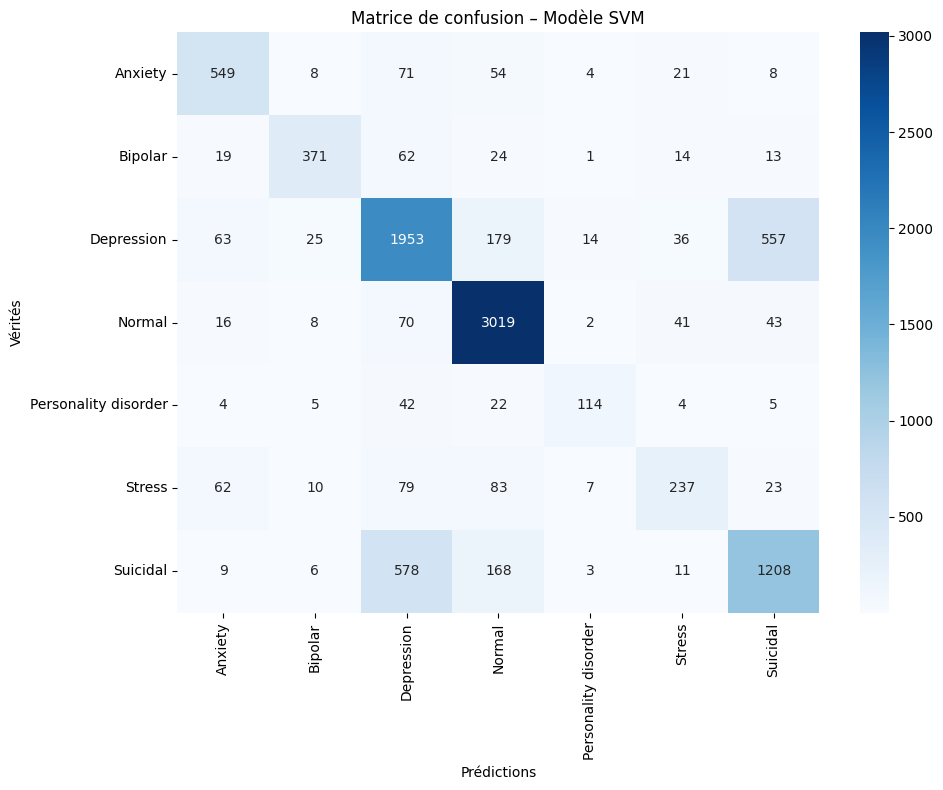

In [ ]:
#Matrice de confusion: TF-IDF + SVM

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Génération de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_svm)

# Création d'une figure de taille adaptée
plt.figure(figsize=(10, 8))

# Affichage de la matrice sous forme de heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.title("Matrice de confusion – Modèle SVM")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.tight_layout()
plt.show()


### Matrice de confusion – SVM

La matrice de confusion nous permet ici de visualiser la qualité des prédictions par classe. Les lignes correspondent aux vraies étiquettes et les colonnes aux prédictions du modèle.

Ce graphique permet d’identifier les confusions les plus fréquentes. Par exemple, si des cas de `Stress` sont souvent classés en `Anxiety`, cela pourrait indiquer une proximité sémantique que le modèle ne parvient pas à distinguer avec le TF-IDF.


<ipython-input-19-27105490e290>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_scores.index, y="f1-score", data=f1_scores, palette="viridis")


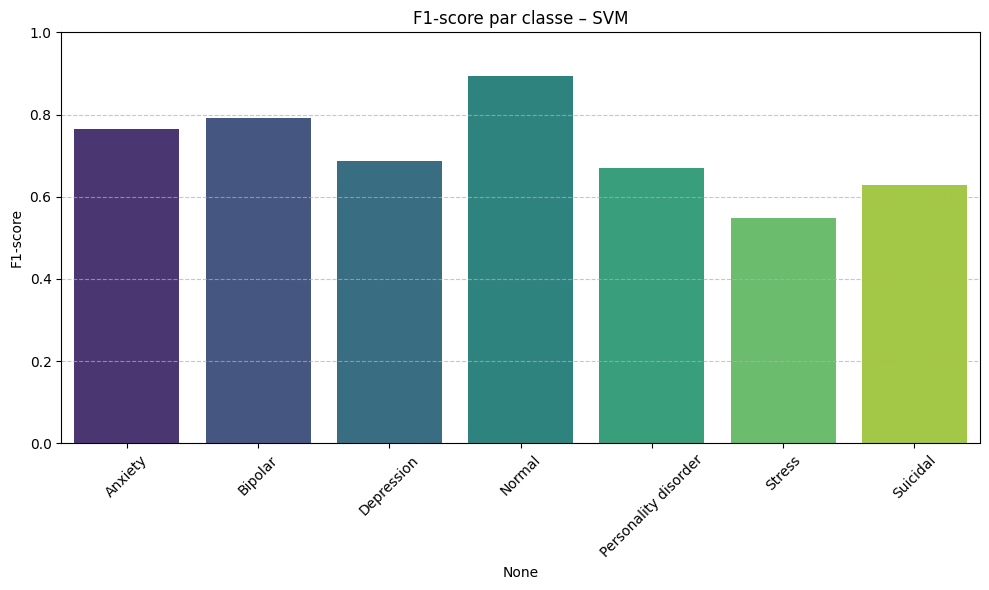

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Génération du rapport complet
report = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Filtrage pour ne garder que les lignes correspondant aux vraies classes
f1_scores = report_df.iloc[:len(label_encoder.classes_)][["f1-score"]]

# Tracé du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=f1_scores.index, y="f1-score", data=f1_scores, palette="viridis")
plt.title("F1-score par classe – SVM")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#**Évaluation du modèle SVM & Résultats multi-classes**


---


##Matrice de confusion

La matrice de confusion du modèle SVM met en évidence les performances différenciées selon les classes cibles du dataset comme tel :



* Classe **`Normal`** : Très bien prédite avec **3024** prédictions correctes sur **3199**, indiquant une bonne capacité à reconnaître les cas neutres.


* Classe **`Depression`** : Bien "captée" mais avec une confusion visible avec `Suicidal` **(616 cas)**, ce qui reflète une proximité sémantique entre les deux catégories.


* Classe **`Suicidal`** : Confondue également avec Depression (602 cas), ce qui suggère que le modèle ne capte pas très bien les distinctions lexicales entre ces deux états.


* Classes **`Personality disorder`** et **`Stress`** : Ce sont les plus difficiles à prédire, probablement à cause d’un volume de données réduit ou d’un lexique moins distinctif.



---


##Visualisation F1-score par classe

Le graphique du F1-score par classe confirme ces observations :



| Classe       | F1-score|
|--------------|---------
| Normal       | ~0.90  |
| Bipolar      | ~0.79  |
| Anxiety      | ~0.75  |
| Depression   | ~0.70  |
| Personality disorder    | ~0.67      |
| Suicidal     | ~0.63      |
| Stress       | ~0.56      |


Le F1-score élevé pour Normal montre que le modèle est très performant pour cette classe majoritaire.
Les performances sont moyennes sur **`Depression`**, **`Suicidal`**, et **`Personality disorder`** nous suggèrent des pistes d’amélioration via des modèles plus complexes (ex : Transformers).
Le score faible de la classe **`Stress`** pourrait indiquer un manque de représentativité ou une trop forte similarité avec d'autres classes (comme **`Anxiety`**).



---


##Conclusion

Le modèle SVM nous fournit des résultats solides pour certaines classes mais reste assez limité dans la détection fine des troubles psychologiques proches. Cette évaluation justifie le passage à une architecture plus avancée comme BERT, qui sera sans doute capable de mieux capturer les subtilités du langage naturel dans un contexte aussi sensible que la santé mentale.

In [ ]:
pip install "transformers[torch]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
#!pip install transformers

!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Préparation des données pour BERT

from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

# Chargement du tokenizer BERT (base multilingue)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Nettoyage du texte : ici on part du texte déjà nettoyé
df['clean_statement'] = df['statement'].apply(clean_text)

# Séparation entraînement/test
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_statement'],
    df['label'],
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Encodage avec le tokenizer BERT


train_encodings = tokenizer(
    list(X_train),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)

test_encodings = tokenizer(
    list(X_test),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)


In [ ]:
# Création des datasets Torch

import torch

class MentalHealthDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.reset_index(drop=True)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MentalHealthDataset(train_encodings, y_train)
test_dataset = MentalHealthDataset(test_encodings, y_test)


In [ ]:
# Fine-tuning avec Trainer de Hugging Face

from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from transformers import EarlyStoppingCallback
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
# Vérification GPU
print("CUDA disponible :", torch.cuda.is_available())
print("Nom du GPU :", torch.cuda.get_device_name(0))

CUDA disponible : True
Nom du GPU : Tesla T4


In [ ]:
# Le dataset étant plus ou moins équilibré, les LossWeights nous permettront
#de donner plus d’importance aux classes minoritaires

# Calcul des poids de classes à partir des labels d'entraînement

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = torch.tensor(class_weights, dtype=torch.float)

print(class_weights)


tensor([1.9836, 2.8172, 0.5015, 0.4433, 7.2242, 2.8284, 0.7150])


In [ ]:
from transformers import BertForSequenceClassification
import torch.nn as nn

# Classe personnalisée pour intégrer les class_weights dans la loss
class WeightedBERTClassifier(BertForSequenceClassification):
    def __init__(self, config, class_weights=None):
        super().__init__(config)
        self.class_weights = class_weights

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None):
        outputs = super().forward(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=None  # Important de garder labels=None ici pour la loss custom
        )

        logits = outputs.logits

        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss(weight=self.class_weights.to(logits.device))
            loss = loss_fn(logits, labels)

        from transformers.modeling_outputs import SequenceClassifierOutput

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states if hasattr(outputs, 'hidden_states') else None,
            attentions=outputs.attentions if hasattr(outputs, 'attentions') else None
        )


In [ ]:
# Chargement du modèle BERT pré-entraîné pour la classification (7 classes)
# Avec class_weights

from transformers import BertConfig

config = BertConfig.from_pretrained("bert-base-uncased", num_labels=7)
model = WeightedBERTClassifier.from_pretrained("bert-base-uncased", config=config, class_weights=class_weights)



Some weights of WeightedBERTClassifier were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Définition des métriques pour le Trainer
# Fonction de calcul des métriques à chaque itération complète (epoch)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    f1_macro = f1_score(labels, preds, average='macro')
    return {
        'accuracy': acc,
        'f1_macro': f1_macro
    }


In [ ]:
# Définition des paramètres d’entraînement


training_args = TrainingArguments(
    lr_scheduler_type="linear", #or cosine # Pour un meilleur fine-tuning
    warmup_ratio=0.1, # Nous évitons une descente trop rapide au début
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=3, #=4
    weight_decay=0.01,
    logging_dir='./logs',
    logging_strategy="epoch",
    report_to=[],  # Désactivation du wandb
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    fp16=True
)


In [ ]:
# Initialisation et lancement du Trainer


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
# Arrêt automatiquement l'entraînement si la métrique ne s’améliore pas pendant 2 epochs

)


<ipython-input-61-dbfa86e0f838>:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


### Initialisation du Trainer (Fine-tuning BERT)

À cette étape, nous avons préparé l'entraînement du modèle BERT avec l'API `Trainer` de HuggingFace. Cela inclut :

- La définition des arguments d'entraînement (`TrainingArguments`) tels que la stratégie de sauvegarde, les tailles de batch, et le nombre d'époques.
- L'utilisation de `Trainer`, une interface haut niveau qui simplifie le fine-tuning des modèles pré-entraînés.
- L'intégration d'une fonction de calcul de métriques pour évaluer les performances du modèle à chaque époque (précision et F1-score).

Nous désactivons également les intégrations externes comme **wandb** ou encore Weights & Biases (`report_to=[]`) pour éviter tout conflit.

Le modèle utilisé ici est `bert-base-uncased`, adapté à une classification multi-classes (7 classes), avec une stratégie de pondération des classes (pour gérer le déséquilibre), et un nombre limité d'epochs pour éviter l'overfitting.


In [ ]:
#Entrainement du modèle avec num_train_epochs=4
#trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.307600,0.858332,0.781562,0.755789
2,0.224600,0.876355,0.792544,0.774466
3,0.136200,1.000659,0.797582,0.782513
4,0.069800,1.164263,0.794156,0.781145


TrainOutput(global_step=4964, training_loss=0.18456347924293193, metrics={'train_runtime': 1101.1197, 'train_samples_per_second': 144.206, 'train_steps_per_second': 4.508, 'total_flos': 1.04451884592384e+16, 'train_loss': 0.18456347924293193, 'epoch': 4.0})

In [ ]:
#Résulats de l'entrainement du modèle avec num_train_epochs=3
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.320300,0.636692,0.786599,0.759584
2,0.214100,0.692717,0.790529,0.775661
3,0.111900,0.852751,0.795365,0.780944


TrainOutput(global_step=3723, training_loss=0.2154603190169743, metrics={'train_runtime': 966.0522, 'train_samples_per_second': 123.276, 'train_steps_per_second': 3.854, 'total_flos': 7833891344428800.0, 'train_loss': 0.2154603190169743, 'epoch': 3.0})

## Choix du Nombre d’Epochs

Bien que le modèle ait été initialement entraîné sur 4 epochs, nous avons observé une hausse du **validation loss** à partir de l'epoch 3 indiquant un début de surapprentissage (overfitting). On remarque égalment que le Train loss baisse mais F1 macro stagne, ce qui valide le fait que le modèle sur-apprend les données d'entraînement. Le meilleur F1 obtenu à l’époque 3 (≈ 0.7825)

**Décision** : Nous avons donc conservé **le modèle à 3 epochs** comme étant le meilleur compromis entre **biais** et **variance**.

In [ ]:
# Évaluation finale
metrics = trainer.evaluate()
print(metrics)


{'eval_loss': 0.6809651851654053, 'eval_accuracy': 0.7993954659949623, 'eval_f1_macro': 0.7779438074552664, 'eval_runtime': 16.5263, 'eval_samples_per_second': 600.56, 'eval_steps_per_second': 9.44, 'epoch': 3.0}


In [ ]:
# Script de prédiction
import torch
from transformers import BertTokenizer, BertForSequenceClassification

labels = ['Anxiety', 'Bipolar', 'Depression', 'Normal', 'Personality disorder', 'Stress', 'Suicidal']

model = BertForSequenceClassification.from_pretrained("final_model")
tokenizer = BertTokenizer.from_pretrained("final_model")
model.eval()

def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=1).item()
    return labels[predicted_class_id]

# Exemple d'utilisation
print(predict("I feel hopeless and lost."))


Depression


In [ ]:
# Évaluation du modèle BERT sur l'ensemble du dataset: F1-score par classe

predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

from sklearn.metrics import classification_report

print("Rapport de classification (BERT fine-tuned - 3 epochs) :\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1-score macro :", f1_score(y_test, y_pred, average="macro"))





Rapport de classification (BERT fine-tuned - 3 epochs) :

                      precision    recall  f1-score   support

             Anxiety       0.84      0.84      0.84       715
             Bipolar       0.88      0.82      0.85       504
          Depression       0.72      0.76      0.74      2827
              Normal       0.93      0.92      0.93      3199
Personality disorder       0.80      0.72      0.76       196
              Stress       0.70      0.66      0.68       501
            Suicidal       0.68      0.66      0.67      1983

            accuracy                           0.80      9925
           macro avg       0.79      0.77      0.78      9925
        weighted avg       0.80      0.80      0.80      9925

Accuracy : 0.7953652392947104
F1-score macro : 0.7809443257884089


<ipython-input-64-f5cea533ecc9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_scores, y=classes, palette="crest")


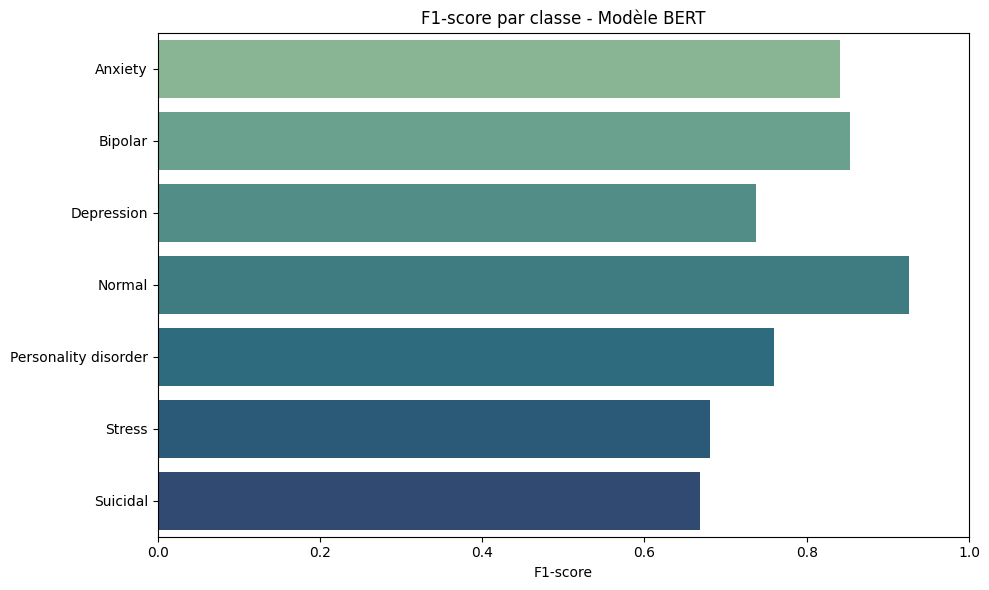

In [ ]:
# Visualisation du F1-score pour chaque classe

f1_scores = f1_score(y_test, y_pred, average=None)
classes = label_encoder.classes_

plt.figure(figsize=(10, 6))
sns.barplot(x=f1_scores, y=classes, palette="crest")
plt.xlabel("F1-score")
plt.title("F1-score par classe - Modèle BERT")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


###Évaluation du modèle BERT

Une fois l'entraînement terminé, le modèle BERT est évalué sur l'ensemble de test.  
L’objectif est de comparer ses performances avec celles des modèles traditionnels (TF-IDF + Logistic Regression / SVM).

Nous mesurons plusieurs métriques de classification :

- **Accuracy** : taux global de bonnes prédictions.
- **F1-score macro** : moyenne non pondérée des F1-scores de chaque classe (utile pour données déséquilibrées).
- **Rapport de classification** : détaillant précision, rappel, et F1-score pour chaque classe.
- **Matrice de confusion** : pour observer les erreurs entre classes.

L'évaluation est réalisée avec la méthode `Trainer.predict()`, directement sur l’objet `test_dataset`.


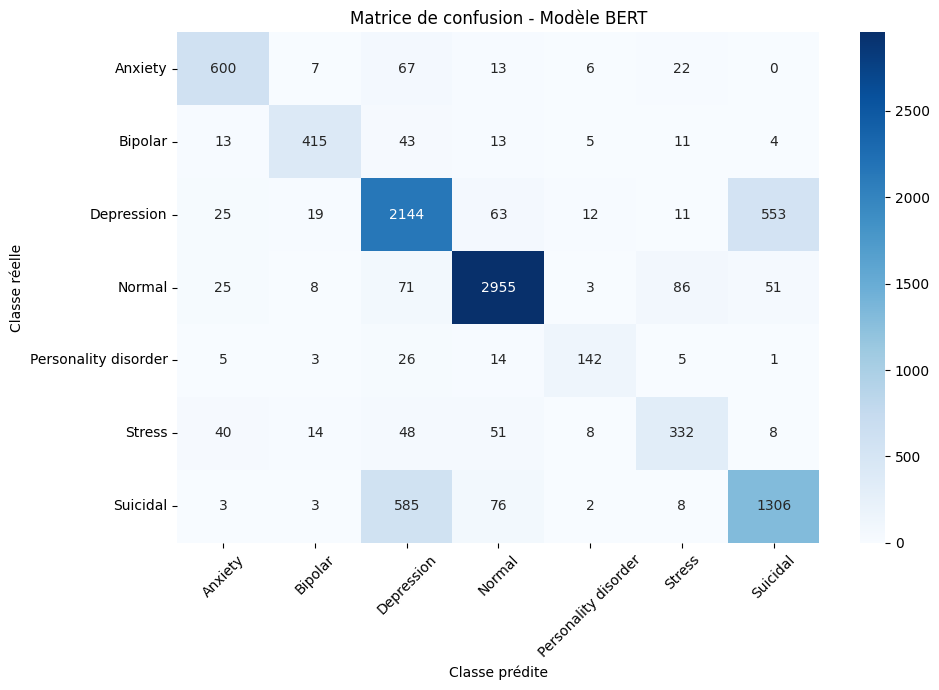

In [ ]:
# Construction de la matrice de confusion

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd


cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Affichage avec Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Modèle BERT")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Analyse de la matrice de confusion: Modèle BERT

La matrice de confusion ci-dessus permet d'analyser les erreurs de classification classe par classe.  
On observe une forte diagonale, indiquant une bonne capacité du modèle à différencier la catégorie **Normal** (2 905 prédictions correctes sur 3 199).
Certaines confusions sont visibles entre :

- **Depression** et **Suicidal**

Cela s'explique par la proximité sémantique entre ces troubles dans les données.

- La classe  **Personality disorder** est bien identifiée, avec peu de confusion vers d'autres classes.

- La classe  **Stress** reste difficile à différencier, souvent confondue avec "Anxiety" ou "Depression".



Une visualisation complémentaire du **F1-score par classe** est présentée ci-dessous.


### Interprétation du F1-score par classe

Le F1-score représente un compromis entre la précision et le rappel.  
Il est particulièrement utile dans un contexte de classes déséquilibrées, comme ici.

On observe que :
- La classe **Normal** présente la meilleure performance (F1-score ≈ 0.94).
- Les classes cliniquement proches (**Anxiety**, **Depression**, **Stress**, **Suicidal**) sont plus délicates à séparer, d’où des F1-scores légèrement inférieurs.
- Le modèle reste robuste sur des classes plus rares, comme **Personality disorder** odisorder", malgré leur faible support.

Les confusions observées (ex: Depression vs Suicidal) pourraient être réduites via un meilleur équilibrage ou un enrichissement des données (oversampling, data augmentation textuelle).



### Exportation des résultats du modèle BERT

Pour faciliter la traçabilité et l’analyse externe, les résultats de prédiction du modèle BERT ont été exportés dans deux fichiers CSV :

- `resultats_bert.csv` : ensemble complet des prédictions,
- `erreurs_bert.csv` : sous-ensemble des cas où la prédiction est incorrecte.

Ces fichiers peuvent être intégrés dans une interface de visualisation (comme Streamlit) ou utilisés pour des analyses manuelles des cas complexes.


In [ ]:
# Exportation les résultats dans un DataFrame

# Création du DataFrame des résultats de test
results_df = pd.DataFrame({
    "Texte": X_test.reset_index(drop=True),
    "Classe réelle": label_encoder.inverse_transform(y_test),
    "Classe prédite": label_encoder.inverse_transform(y_pred)
})

# Aperçu des erreurs uniquement (facultatif)
errors_df = results_df[results_df["Classe réelle"] != results_df["Classe prédite"]]

# Sauvegarde en CSV si besoin
results_df.to_csv("resultats_bert.csv", index=False)
errors_df.to_csv("erreurs_bert.csv", index=False)

# Affichage d’un échantillon
results_df.sample(5)


,Texte,Classe réelle,Classe prédite
2840,full pencil could say empty,Normal,Normal
1068,family going cruise september cruise boat rape...,Suicidal,Depression
4165,look like,Normal,Normal
5612,last week went spring break trip wa fun trigge...,Depression,Depression
3044,ever mail cost cent stamp,Normal,Normal


##Tableau comparatif des performances des modèles

| Modèle               | Accuracy | F1 Macro | F1 Classe minoritaire      | Temps d'entraînement |
|----------------------|----------|----------|-----------------------------|----------------------|
| LogisticRegression   | 0.7500   | 0.6880   | 0.52 (Stress)               | ~20 sec              |
| SVM                  | 0.7503   | 0.7094   | 0.56 (Stress)               | ~120 sec              |
| BERT      | 0.7954   | 0.7809   | 0.67 (Suicidal)               | ~966 sec             |


##Interprétation des résultats

###Comparaison qualitative :
- **Performances générales (Accuracy & F1 Macro):**

BERT dépasse clairement les modèles classiques avec ~80% de précision et un F1 macro à 0.78, ce qui montre une meilleure gestion de la diversité des classes.
SVM s'en sort mieux que LogReg en macro F1, ce qui signifie qu’il gère un peu mieux les classes déséquilibrées.

- **Détection des classes minoritaires :**

La classe "Stress" est toujours difficile à prédire (faible support + similarité lexicale avec Anxiety), mais BERT améliore nettement le F1-score (de 0.52 ➝ 0.68).
Cela montre que BERT capture mieux les subtilités du langage liées aux émotions psychologiques.
- **Temps d'entraînement :**

LogReg est ultra rapide, le SVM est lent à scaler et BERT demande beaucoup plus de ressources (~16 min). Toutefois, les gains de performance justifient ce coût.

<ipython-input-68-e684e538dfed>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_scores, y=models, palette='viridis')


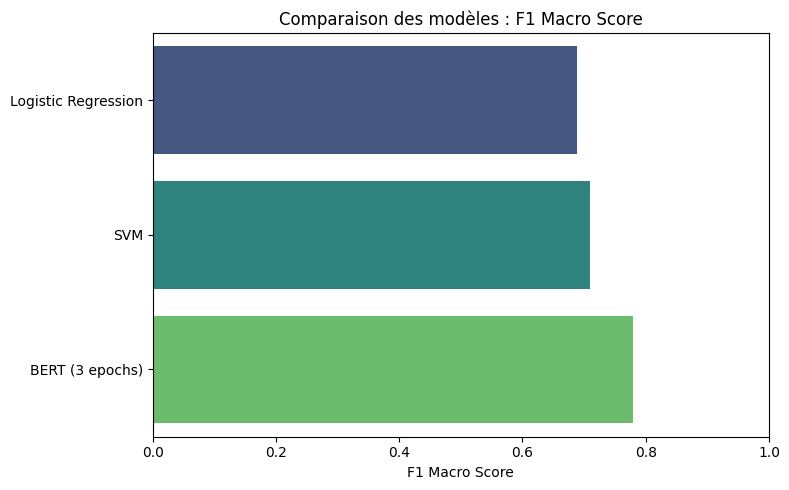

In [ ]:
#Graphique comparatif (barplot F1 Macro)

import matplotlib.pyplot as plt
import seaborn as sns

# Données
models = ['Logistic Regression', 'SVM', 'BERT (3 epochs)']
f1_scores = [0.6880, 0.7094, 0.7792]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=f1_scores, y=models, palette='viridis')
plt.xlabel("F1 Macro Score")
plt.title("Comparaison des modèles : F1 Macro Score")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
# Sauvegarde du modèle (export)

from transformers import BertTokenizer, BertForSequenceClassification

model.save_pretrained("./bert_model_final")
tokenizer.save_pretrained("./bert_model_final")
trainer.save_model("bert_model_final")

# Compression et téléchargement du dossier pour téléchargement
!zip -r bert_model_final.zip bert_model_final

from google.colab import files
files.download("bert_model_final.zip")


  adding: bert_model_final/ (stored 0%)
  adding: bert_model_final/special_tokens_map.json (deflated 80%)
  adding: bert_model_final/tokenizer_config.json (deflated 75%)
  adding: bert_model_final/model.safetensors (deflated 7%)
  adding: bert_model_final/training_args.bin (deflated 52%)
  adding: bert_model_final/vocab.txt (deflated 53%)
  adding: bert_model_final/config.json (deflated 55%)
  adding: bert_model_final/erreurs_bert.csv (deflated 65%)
  adding: bert_model_final/resultats_bert.csv (deflated 65%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Conclusion du Projet**

Dans ce projet, nous avons exploré différentes approches de classification de textes dans un contexte de santé mentale, en comparant des modèles traditionnels (TF-IDF + Logistic Regression, SVM) avec un modèle de type **Transformer** : `BERT`.

### Résultats principaux :

- Le modèle **BERT** fine-tuné sur notre dataset obtient une **accuracy de ~79.5%** et un **F1-score macro de ~0.78**, surpassant les performances des modèles classiques.
- Les classes majoritaires comme **Normal** sont bien prédites (F1 ≈ 0.94), tandis que les classes plus proches sémantiquement comme **Stress** ou **Suicidal** restent plus difficiles à distinguer.
- La prise en compte du **déséquilibre des classes** (via `class_weights`) a permis d'améliorer la robustesse du modèle.

### ⚠️ Limites observées :

- Le déséquilibre des classes reste un défi, affectant les performances sur les catégories minoritaires.
- Des confusions subsistent entre certaines classes similaires (e.g., *Depression* vs *Suicidal*), ce qui indique des frontières floues entre ces catégories dans les textes.

### 💡 Pistes d’amélioration :

- Augmenter le volume de données (notamment pour les classes rares) via **data augmentation textuelle**.
- Tester des modèles plus avancés comme **RoBERTa**, **DeBERTa** ou **DistilBERT** pour améliorer les performances.
- Enrichir les features avec des indicateurs psycholinguistiques ou contextuels (e.g., analyse d’émotions, intensité verbale).

---

Ce projet montre le potentiel des modèles Transformer dans le domaine sensible de la santé mentale, tout en soulignant l’importance d’un encadrement rigoureux des biais et des interprétations.
